# **1. Install pycaret**

In [ ]:
!pip install pycaret[full]
!pip install packaging==20.9

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.42.1 requires packaging>20.9, but you have packaging 20.9 which is incompatible.
statsmodels 0.14.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xarray 2023.7.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.


# **2. Check the pycaret version**

In [ ]:
import pycaret
print(pycaret.__version__)

3.0.4


# **3. Get the dataset from github**

In [ ]:
import pandas as pd
dataset_url = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/Lecture2_Assignments/Assignment1/sales_ts_without_exogenous.csv'
dataset = pd.read_csv(dataset_url)

# **4. Scan the dataset**

In [ ]:
print("(Rows, Columns) in the dataset : ", dataset.shape, "\n\n")
dataset.head()

(Rows, Columns) in the dataset :  (365, 3) 




,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


In [ ]:
copied_dataset = dataset[['Date', 'Sales']]
copied_dataset

,Date,Sales
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123
...,...,...
360,2022-09-26,43.698457
361,2022-09-27,38.827336
362,2022-09-28,38.761570
363,2022-09-29,41.144471


In [ ]:
clean_dataset = copied_dataset.copy()
clean_dataset.index = pd.to_datetime(clean_dataset['Date'], errors='ignore')
clean_dataset.drop('Date', axis=1, inplace=True)
clean_dataset.head()


,Sales
Date,
2021-10-01,29.109547
2021-10-02,30.720435
2021-10-03,30.305173
2021-10-04,27.390893
2021-10-05,22.841123


array([<Axes: xlabel='Date'>], dtype=object)

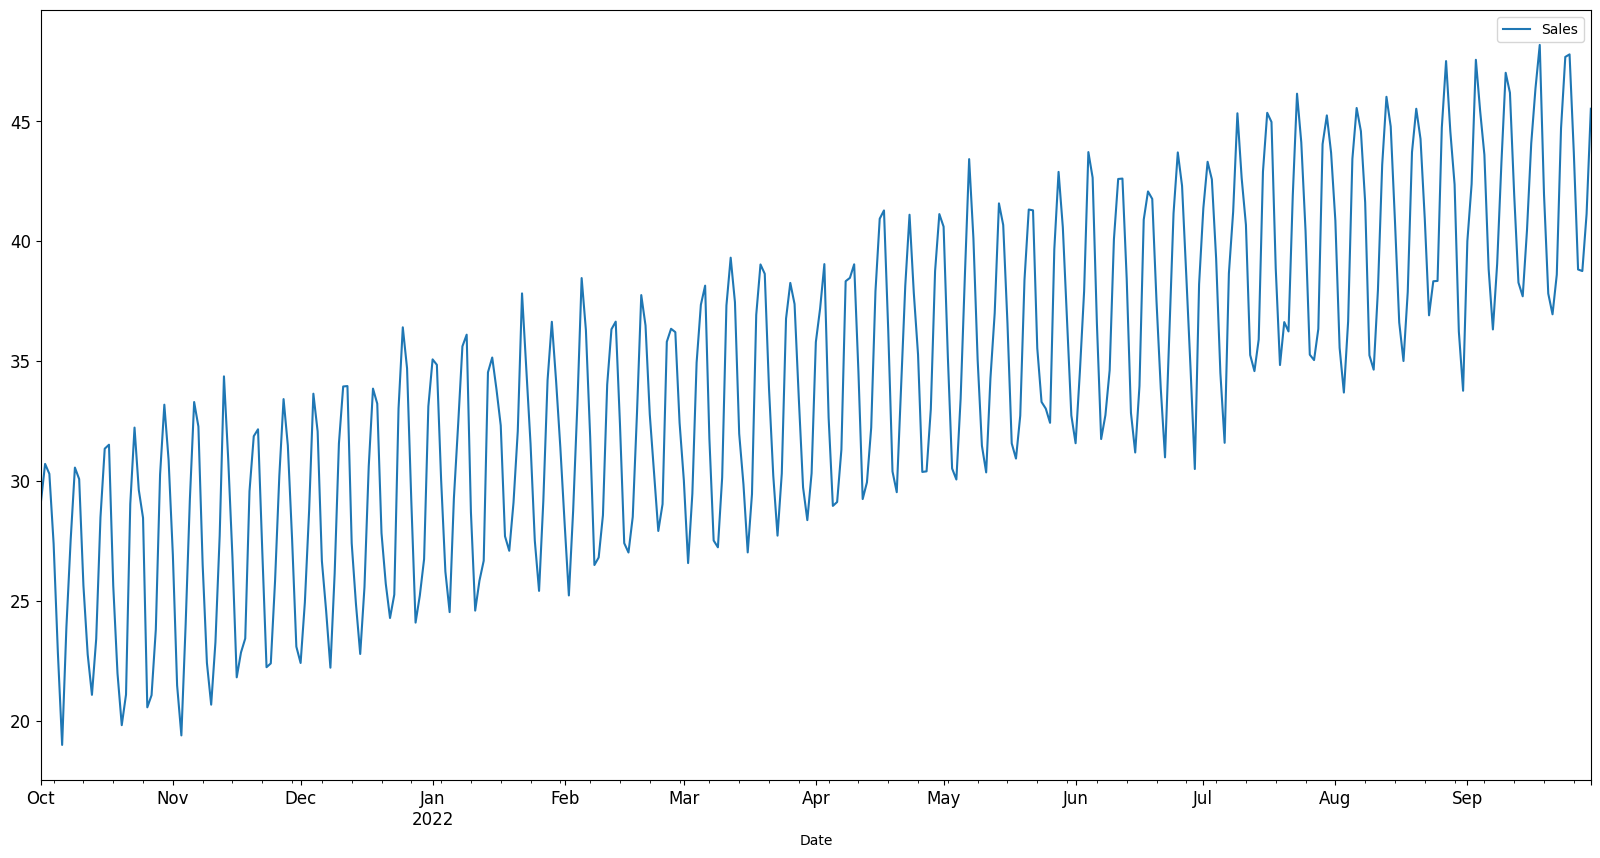

In [ ]:
clean_dataset.plot(subplots=True, figsize=(20, 10), fontsize=12)

# **5. Setup**

In [ ]:
from pycaret.time_series import *
setup(clean_dataset, fh = 3, session_id = 123, use_gpu = True)

,Description,Value
0,session_id,123
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(362, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

# **6. Check Stats**

In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,365.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,34.093942
3,Summary,Statistics,Transformed,Median,,33.971567
4,Summary,Statistics,Transformed,Standard Deviation,,6.572683
5,Summary,Statistics,Transformed,Variance,,43.200164
6,Summary,Statistics,Transformed,Kurtosis,,-0.685853
7,Summary,Statistics,Transformed,Skewness,,-0.025315
8,Summary,Statistics,Transformed,# Distinct Values,,365.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",3283.829033


# **6. Compare Models**


In [49]:
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [50]:
best = create_model('snaive')
best


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-09-18,0.3878,0.3824,0.4113,0.5077,0.0110,0.0109,0.9459
1,2022-09-21,1.1965,1.0247,1.2623,1.3554,0.0298,0.0296,0.8714
2,2022-09-24,0.9898,0.8930,1.0460,1.1815,0.0246,0.0250,0.8961
Mean,NaT,0.8581,0.7667,0.9066,1.0149,0.0218,0.0218,0.9045
SD,NaT,0.3430,0.2770,0.3612,0.3656,0.0079,0.0079,0.0310


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

NaiveForecaster(sp=7)

# **6. Analyze Models**

In [ ]:
plot_model(best, plot = 'forecast')

In [ ]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 48})

In [ ]:
plot_model(best, plot = 'residuals')

# **6. Prediction**

In [ ]:
price_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Seasonal Naive Forecaster,1.6241,1.4035,1.7162,1.8554,0.0420,0.0430,0.5619


In [ ]:
price_pred.head()

,y_pred
2022-09-28,36.9585
2022-09-29,38.6114
2022-09-30,44.7175


In [ ]:
predict_model(best, fh = 36)

,y_pred
2022-09-28,36.9585
2022-09-29,38.6114
2022-09-30,44.7175
2022-10-01,47.6906
2022-10-02,47.7968
2022-10-03,43.6985
2022-10-04,38.8273
2022-10-05,36.9585
2022-10-06,38.6114
2022-10-07,44.7175


# **11. Saving the model**

In [ ]:
save_model(best,'sales_model_V1')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 NaiveForecaster(sp=7))]))]),
 'sales_model_V1.pkl')

# **12. Load the saved model (for future prediction)**

In [ ]:
loaded_sales_model = load_model('sales_model_V1')
loaded_sales_model

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(sp=7))]))])